# Testing with old data


In [1]:
import networkx as nx
import numpy as np
import pandas as pd


In [2]:
p = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/07-clustered-graphs/alpha0.3_k20_res0.005.graphml"
G = nx.read_graphml(p)

clusters_to_keep = list(range(5, 15))
G = G.subgraph([n for n, d in G.nodes(data=True) if d["cluster"] in clusters_to_keep])
#
# p = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/07-clustered-graphs/SUBSETalpha0.3_k20_res0.005.graphml"
# nx.write_graphml(G, p)


In [4]:
!pip install pconfluent


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 2.5 MB/s eta 0:00:00
  Created wheel for pconfluent: filename=pconfluent-0.4-cp311-cp311-macosx_11_0_arm64.whl size=21474 sha256=59d99114cbe2bd7a9efb44a9e41e46ec80e9ca87272cce343cabc0c8ad3509bd
  Stored in directory: /Users/jlq293/Library/Caches/pip/wheels/98/36/c6/0171f5322dafee092784aa2e1074a11d305980d842dd3b094c
Successfully built pconfluent


In [8]:
import s_gd2


In [9]:
import pconfluent

I = [0, 0, 0, 1, 1, 1, 2, 2, 2]
J = [3, 4, 5, 3, 4, 5, 3, 4, 5]
Ir, Jr, Ip, Jp = pconfluent.find_power_graph(I, J)
pconfluent.draw_confluent(Ir, Jr, Ip, Jp, filepath="K33.svg")


In [11]:
pconfluent.find_power_graph(I, J, w_intersect=10, w_difference=1)


(array([6, 6, 6, 7, 7, 7], dtype=int32),
 array([0, 2, 1, 4, 5, 3], dtype=int32),
 array([6], dtype=int32),
 array([7], dtype=int32))

In [14]:
edges = pd.read_csv(
    "/Users/jlq293/Downloads/Nature150/www.nature.com/www.nature.com/immersive/d41586-019-03165-4/dat/cociteEdges.csv"
)


In [23]:
edges["path"].isna().sum()


edges_n = edges.dropna(subset=["path"])


In [27]:
xs = (
    edges_n["path"]
    .str.split("|")
    .apply(lambda path: [coord.split(";")[0] for coord in path])
)

zs = (
    edges_n["path"]
    .str.split("|")
    .apply(lambda path: [coord.split(";")[2] for coord in path])
)


In [34]:
vs = zs.apply(lambda x: len(x))


In [36]:
vs.value_counts()


path
2      23279
15       427
14       407
11       387
13       384
       ...  
112        1
132        1
117        1
108        1
121        1
Name: count, Length: 114, dtype: int64

In [ ]:
xs.describe()


count    38610.000000
mean       -85.763636
std       1643.564775
min      -4913.000000
25%      -1619.000000
50%        332.000000
75%       1231.000000
max       4638.000000
Name: path, dtype: float64

In [42]:
clusters_to_keep = list(range(5, 15))
Gsub = G.subgraph(
    [n for n, d in G.nodes(data=True) if d["cluster"] in clusters_to_keep]
)

# count edges between clusters
edges_between_clusters = {}

for n1, n2, d in G.edges(data=True):
    c1 = G.nodes[n1]["cluster"]
    c2 = G.nodes[n2]["cluster"]
    if c1 != c2:
        if (c1, c2) not in edges_between_clusters:
            edges_between_clusters[(c1, c2)] = 0
        if (c2, c1) not in edges_between_clusters:
            edges_between_clusters[(c2, c1)] = 0
        edges_between_clusters[(c1, c2)] += 1
        edges_between_clusters[(c2, c1)] += 1

excl_edges_between_clusters = {}
for (c1, c2), count in edges_between_clusters.items():
    if (c2, c1) not in excl_edges_between_clusters:
        excl_edges_between_clusters[(c1, c2)] = count


# sort after number of edges
excl_edges_between_clusters = sorted(
    excl_edges_between_clusters.items(), key=lambda x: x[1], reverse=True
)

excl_edges_between_clusters[:20]


[((8.0, 1.0), 3193),
 ((6.0, 7.0), 3117),
 ((4.0, 24.0), 1768),
 ((2.0, 91.0), 1702),
 ((5.0, 64.0), 1626),
 ((92.0, 1.0), 1611),
 ((4.0, 72.0), 1594),
 ((27.0, 29.0), 1477),
 ((5.0, 12.0), 1434),
 ((29.0, 3.0), 1401)]

In [35]:
excl_edges_between_clusters = {}

for (c1, c2), count in edges_between_clusters.items():
    # Check if the counts for both (c1, c2) and (c2, c1) exist in edges_between_clusters
    if (c1, c2) in edges_between_clusters and (c2, c1) in edges_between_clusters:
        # Retrieve the counts for both directions
        c1_c2_count = edges_between_clusters[(c1, c2)]
        c2_c1_count = edges_between_clusters[(c2, c1)]
        # Sum the counts to get the total count of edges between the clusters
        total_count = c1_c2_count + c2_c1_count
        # Add the total count to excl_edges_between_clusters
        excl_edges_between_clusters[(c1, c2)] = total_count


In [36]:
print(len(edges_between_clusters), len(excl_edges_between_clusters))


16168 13398


In [24]:
# sort after number of edges
edges_between_clusters = sorted(
    edges_between_clusters.items(), key=lambda x: x[1], reverse=True
)

edges_between_clusters[:10]


[((1.0, 8.0), 2253),
 ((6.0, 7.0), 1983),
 ((2.0, 91.0), 1180),
 ((7.0, 6.0), 1134),
 ((5.0, 64.0), 1131),
 ((29.0, 3.0), 1079),
 ((12.0, 5.0), 1076),
 ((27.0, 3.0), 1016),
 ((4.0, 24.0), 983),
 ((92.0, 1.0), 961)]

In [40]:
# sort after number of edges
excl_edges_between_clusters = sorted(
    excl_edges_between_clusters.items(), key=lambda x: x[1], reverse=True
)

excl_edges_between_clusters[:10]
# build sanky diagram


[((8.0, 1.0), 3193),
 ((6.0, 7.0), 3117),
 ((4.0, 24.0), 1768),
 ((2.0, 91.0), 1702),
 ((5.0, 64.0), 1626),
 ((92.0, 1.0), 1611),
 ((4.0, 72.0), 1594),
 ((27.0, 29.0), 1477),
 ((5.0, 12.0), 1434),
 ((29.0, 3.0), 1401)]

In [11]:
p = f"/Users/jlq293/Downloads/Nature150/www.nature.com/www.nature.com/immersive/d41586-019-03165-4/dat/cociteEdges2.csv"
edges = pd.read_csv(p)
p = "/Users/jlq293/Downloads/Nature150/www.nature.com/www.nature.com/immersive/d41586-019-03165-4/dat/cociteNodes.csv"
nodes = pd.read_csv(p)

print(f"Nr of nodes: {len(nodes)}")
print(f"Nr of edges: {len(edges)}")


Nr of nodes: 0
Nr of edges: 0


In [10]:
edges["path"][0]


'-1834.0;529.0;66.0|-1663.6;555.5;58.3|-1489.9;579.1;51.9|-1313.1;595.4;47.0|-1135.0;598.9;43.9|-956.9;584.2;42.0|-778.4;548.8;40.9|-598.5;493.8;40.4|-418.0;424.2;40.2|-241.3;347.2;40.1|-76.7;271.0;40.0|63.9;204.2;40.0|166.7;154.9;40.0|219.8;129.5;40.0|217.1;131.1;40.0|160.5;159.0;40.0|57.6;210.2;40.0|-80.9;280.8;40.1|-243.3;367.4;40.3|-418.1;467.4;40.8|-595.1;578.8;41.8|-766.3;699.5;43.6|-925.8;825.8;46.6|-1068.4;951.1;50.9|-1190.4;1067.8;56.6|-1290.1;1168.6;63.5|-1369.2;1248.6;71.3|-1433.1;1304.1;79.6|-1489.6;1330.5;88.0|-1546.8;1321.2;96.3|-1610.9;1269.4;103.9|-1684.1;1172.1;110.8|-1765.1;1033.0;117.1|-1850.6;862.9;122.8|-1937.9;677.8;128.4|-1716.0;640.0;124.4'

In [8]:
nodes.head()


,x,y,size,PubYear,HierCat,NatureID,Title
0,-1247,1345,5.3,1900,1,062366b0,Atmospheric Electricity
1,-284,1083,4.6,1900,10,062340b0,The Conductivity produced in Gases by the Moti...
2,822,346,7.9,1900,1,062620e0,Albinism and Natural Selection
3,-1316,1279,4.6,1900,10,062149b0,Atmospheric Electricity
4,587,1598,4.0,1900,4,062523e0,Leaf Decay and Autumn Tints


In [3]:
p = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/07-clustered-graphs/alpha0.3_k10_res0.002.graphml"
G = nx.read_graphml(p)
print(f"Nr of nodes: {len(G.nodes)}")
print(f"Nr of edges: {len(G.edges)}")`


Nr of nodes: 36975
Nr of edges: 553370


In [4]:
p = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/07-clustered-graphs/alpha0.3_k20_res0.005.graphml"
G = nx.read_graphml(p)
print(f"Nr of nodes: {len(G.nodes)}")
print(f"Nr of edges: {len(G.edges)}")


Nr of nodes: 40643
Nr of edges: 899992


In [5]:
p = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/05-graphs/citation-graph/directed_citation_graph.graphml"
G = nx.read_graphml(p)
print(f"Nr of nodes: {len(G.nodes)}")
print(f"Nr of edges: {len(G.edges)}")


Nr of nodes: 40643
Nr of edges: 360645


In [4]:
np.random.seed(1)
cats, n, m = 4, 80, 1000

cnodes = pd.concat(
    [
        pd.DataFrame.from_records(
            [("node" + str(i + 100 * c), "c" + str(c)) for i in range(n)],
            columns=["name", "cat"],
        )
        for c in range(cats)
    ],
    ignore_index=True,
)
cnodes.cat = cnodes.cat.astype("category")

cedges = pd.concat(
    [
        pd.DataFrame(
            np.random.randint(n * c, n * (c + 1), size=(m, 2)),
            columns=["source", "target"],
        )
        for c in range(cats)
    ],
    ignore_index=True,
)


In [5]:
cnodes


,name,cat
0,node0,c0
1,node1,c0
2,node2,c0
3,node3,c0
4,node4,c0
...,...,...
315,node375,c3
316,node376,c3
317,node377,c3
318,node378,c3


In [6]:
cedges


,source,target
0,37,12
1,72,9
2,75,5
3,79,64
4,16,1
...,...,...
3995,264,307
3996,292,251
3997,256,309
3998,263,279


In [12]:
p = "../data/04-embeddings/df_with_specter2_embeddings.pkl"
df_emb = pd.read_pickle(p)
pc = "../data/02-clean/scopus_cleaned_subset.pkl"

df_cl = pd.read_pickle(pc)


In [13]:
df_cl[["year", "unique_auth_year"]]


,year,unique_auth_year
0,1982,Bruni_1982
1,1982,Magnussen_1982_4
2,1982,Magnussen_1982_3
3,1982,Magnussen_1982_2
4,1982,Magnussen_1982
...,...,...
40638,2023,Manis_2023
40639,2023,Mandal_2023_2
40640,2023,Mandal_2023
40641,2023,TorresPinto_2023


In [16]:
eid_uan_dict = dict(zip(df_cl["eid"], df_cl["unique_auth_year"]))

df_emb["unique_auth_year"] = df_emb["eid"].map(eid_uan_dict)

# save to pickle
df_emb.to_pickle("../data/04-embeddings/df_with_specter2_embeddings.pkl")


In [15]:
df_emb[["year", "unique_auth_year"]]


,year,unique_auth_year
0,1982,Ogren_1982
1,1982,Heym_1982
2,1982,Boeck_1982
3,1982,Yoffe_1982
4,1982,Martin_1982
...,...,...
40638,2023,Ong_2023
40639,2023,Gandhi_2023
40640,2023,Cottone_2023
40641,2023,Kuzin_2023_2


In [8]:
df = pd.read_pickle(
    "/Users/jlq293/Projects/Study-1-Bibliometrics/data/03-interim/specter-embeddings/df_with_specter2_embeddings.pkl"
)
df.shape


(35153, 29)

In [6]:
df.columns


Index(['authors', 'title', 'year', 'cited_by', 'doi', 'link', 'abstract',
       'author_keywords', 'index_keywords', 'references', 'pubmed_id',
       'document_type', 'source', 'eid', 'journal', 'first_author', 'nameyear',
       'unique_nameyear', 'title_abstract', 'paper_id', 'oc_refs', 'oc_dois',
       'cr_refs', 'cr_dois', 'merged_dois', 'oc_nr_dois', 'cr_nr_dois',
       'merged_nr_dois', 'specter2_embeddings'],
      dtype='object')

# KNN


In [7]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

X = np.array(df["specter2_embeddings"].tolist())

# Number of neighbors
k = 10

# Initialize and fit the model
# metric='cosine' will use cosine similarity
knn = NearestNeighbors(n_neighbors=k, metric="cosine")
knn.fit(X)

# Find k-nearest neighbors for each point
distances, indices = knn.kneighbors(X)


In [18]:
# max similarity score
len(distances)
# turn off scientific notation
np.set_printoptions(suppress=True)
distances


array([[0.        , 0.04248786, 0.05208212, ..., 0.05725467, 0.06045407,
        0.06075859],
       [0.00000006, 0.0923996 , 0.09254497, ..., 0.09979272, 0.09983027,
        0.0998652 ],
       [0.00000018, 0.06835675, 0.06915379, ..., 0.07794213, 0.07838231,
        0.07896042],
       ...,
       [0.0000003 , 0.04048586, 0.0540055 , ..., 0.06445777, 0.06479794,
        0.06515932],
       [0.        , 0.030954  , 0.03975713, ..., 0.04864299, 0.04924732,
        0.05060935],
       [0.        , 0.04249674, 0.04303199, ..., 0.0618006 , 0.06327552,
        0.06334496]], dtype=float32)

In [13]:
similarities


array([[1.        , 0.95751214, 0.9479179 , ..., 0.9427453 , 0.9395459 ,
        0.9392414 ],
       [0.99999994, 0.9076004 , 0.907455  , ..., 0.9002073 , 0.90016973,
        0.9001348 ],
       [0.9999998 , 0.93164325, 0.9308462 , ..., 0.92205787, 0.9216177 ,
        0.9210396 ],
       ...,
       [0.9999997 , 0.95951414, 0.9459945 , ..., 0.9355422 , 0.93520206,
        0.9348407 ],
       [1.        , 0.969046  , 0.96024287, ..., 0.951357  , 0.9507527 ,
        0.94939065],
       [1.        , 0.95750326, 0.956968  , ..., 0.9381994 , 0.9367245 ,
        0.93665504]], dtype=float32)

In [ ]:
# loop over each pair in similarty matrix and calcutee the edge weight by retrieving the cite score, multiply by alpha, and add to the


In [20]:
for i in range(5, 21, 5):
    print(i)


5
10
15


/Users/jlq293/Projects/Study-1-Bibliometrics/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jlq293/Projects/Study-1-Bibliometrics/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jlq293/Projects/Study-1-Bibliometrics/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jlq293/Projects/Study-1-Bibliometrics/.conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

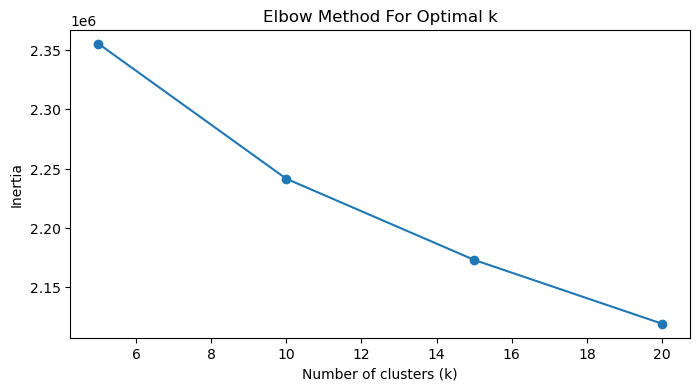

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming you have a features matrix X

# Range of k to try
k_values = range(5, 21, 5)
inertia = []

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42, m)
    model.fit(X)
    inertia.append(model.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, "o-")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.show()


In [3]:
import networkx as nx
import numpy as np
import plotly.graph_objects as go
from sklearn.manifold import TSNE

# Create a sample graph
G = nx.karate_club_graph()
pos = nx.spring_layout(G)  # Initial 2D layout

# Convert positions to a list of coordinates
nodes = list(G.nodes())
pos_list = [pos[node] for node in nodes]

# Convert the list of coordinates to a NumPy array
pos_array = np.array(pos_list)

# Use t-SNE to project 2D coordinates to 3D
tsne = TSNE(n_components=3, random_state=0)
pos_3d = tsne.fit_transform(pos_array)

# Create a dictionary of 3D positions
pos_3d_dict = {nodes[i]: pos_3d[i] for i in range(len(nodes))}

# Prepare edge traces
edge_traces = []
for edge in G.edges():
    x_coords = [pos_3d_dict[edge[0]][0], pos_3d_dict[edge[1]][0], None]
    y_coords = [pos_3d_dict[edge[0]][1], pos_3d_dict[edge[1]][1], None]
    z_coords = [pos_3d_dict[edge[0]][2], pos_3d_dict[edge[1]][2], None]
    edge_trace = go.Scatter3d(
        x=x_coords,
        y=y_coords,
        z=z_coords,
        line=dict(width=2, color="#888"),
        hoverinfo="none",
        mode="lines",
    )
    edge_traces.append(edge_trace)

# Prepare node traces
node_trace = go.Scatter3d(
    x=[pos_3d_dict[node][0] for node in G.nodes()],
    y=[pos_3d_dict[node][1] for node in G.nodes()],
    z=[pos_3d_dict[node][2] for node in G.nodes()],
    mode="markers",
    marker=dict(
        size=5,
        color=[pos_3d_dict[node][2] for node in G.nodes()],
        colorscale="Viridis",
        line=dict(width=0),
    ),
    text=[f"Node {node}" for node in G.nodes()],
    hoverinfo="text",
)

# Create the 3D plot
fig = go.Figure(
    data=edge_traces + [node_trace],
    layout=go.Layout(
        title="3D Network Graph with t-SNE Projection",
        showlegend=False,
        scene=dict(
            xaxis=dict(showgrid=False, zeroline=False),
            yaxis=dict(showgrid=False, zeroline=False),
            zaxis=dict(showgrid=False, zeroline=False),
        ),
    ),
)

fig.show()


ValueError: n_components=3 must be between 1 and min(n_samples, n_features)=2 with svd_solver='randomized'

# INFOMAP


In [473]:
from typing import Dict, List, Optional, Tuple

import networkx as nx
import pandas as pd
from infomap import Infomap


def load_graph(path: str) -> nx.Graph:
    """
    Load a GraphML file and convert node labels to integers.

    Args:
        path (str): Path to the GraphML file.

    Returns:
        nx.Graph: Loaded graph with integer node labels.
    """
    G = nx.read_graphml(path)
    return nx.convert_node_labels_to_integers(G, label_attribute="old_label")


def run_infomap(
    G: nx.Graph, num_trials: int = 5, markov_time: int = 2, use_weights: bool = True
) -> Tuple[Infomap, Dict[int, int]]:
    """
    Run Infomap community detection on a NetworkX graph.

    Args:
        G (nx.Graph): Input graph.
        num_trials (int): Number of Infomap trials.
        use_weights (bool): Whether to use edge weights.

    Returns:
        Tuple[Infomap, Dict[int, int]]: Infomap object and community assignments.
    """
    print("Building Infomap network from a NetworkX graph...")
    im = Infomap(
        two_level=False,
        silent=False,
        flow_model="undirected",
        # num_trials=num_trials,
        # markov_time=2.5,
        # variable_markov_time = True,
        # preferred_number_of_modules=5,
        # multilevel_resolution=0.7,
        # entropy_corrected=True,
        # entropy_correction_strength=6
        seed=42,
    )

    if use_weights:
        for u, v, data in G.edges(data=True):
            weight = data.get("weight", 1.0)  # Default to 1.0 if no weight is specified
            im.add_link(u, v, weight)
    else:
        im.add_networkx_graph(G)

    print("Find communities with Infomap...")
    im.run()
    print(
        f"Found {im.num_top_modules} modules with codelength {im.codelength:.8f} bits"
    )

    return im, im.get_modules()


def process_hierarchy(path: List[int], max_depth: int) -> Tuple[Optional[int], ...]:
    """
    Process the hierarchical path and return levels up to max_depth.

    Args:
        path (List[int]): Hierarchical path from Infomap.
        max_depth (int): Maximum depth of the hierarchy.

    Returns:
        Tuple[Optional[int], ...]: Hierarchy levels up to max_depth.
    """
    hier = [None] * max_depth
    for i, level in enumerate(path[:max_depth]):
        hier[i] = level
    return tuple(hier)


def create_dataframe(im: Infomap, G: nx.Graph) -> pd.DataFrame:
    """
    Create a DataFrame with community information and node attributes.

    Args:
        im (Infomap): Infomap object after running community detection.
        G (nx.Graph): Input graph.

    Returns:
        pd.DataFrame: DataFrame with community and node information.
    """
    df = im.get_dataframe()
    df["title"] = [G.nodes[n]["title"] for n in df["node_id"]]

    # Determine the maximum depth of the hierarchy
    max_depth = max(len(path) for path in df["path"])

    # Process hierarchies
    hierarchy = [process_hierarchy(path, max_depth) for path in df["path"]]

    # Create hierarchy level columns dynamically
    for i in range(max_depth):
        df[f"hier_{i+1}"] = [h[i] for h in hierarchy]

    return df


def main(graphml_path: str, use_weights: bool = True) -> pd.DataFrame:
    """
    Main function to run the Infomap community detection pipeline.

    Args:
        graphml_path (str): Path to the input GraphML file.
        use_weights (bool): Whether to use edge weights in community detection.

    Returns:
        pd.DataFrame: Resulting DataFrame with community information.
    """
    G = load_graph(graphml_path)
    im, communities = run_infomap(G, use_weights=use_weights)
    nx.set_node_attributes(G, communities, "community")
    return create_dataframe(im, G)


# if __name__ == "__main__":
#    graphml_path = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/05-graphs/weighted-knn-citation-graph/weighted_alpha0.3_k10_knn_citation.graphml"
#    result_df = main(graphml_path, use_weights=True)
#    print(result_df["hier_1"].value_counts())


In [474]:
G = load_graph(graphml_path)
im, communities = run_infomap(G, use_weights=True)
nx.set_node_attributes(G, communities, "community")
result_df = create_dataframe(im, G)

print(result_df.columns)


Building Infomap network from a NetworkX graph...
Find communities with Infomap...
Found 9 modules with codelength 11.35450495 bits
  Infomap v2.8.0 starts at 2024-10-02 11:02:55
  -> Input network: 
  -> No file output!
  -> Configuration: flow-model = undirected
                    seed = 42
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1.000000000, sum link flow: 1.000000000
Build internal network with 40643 nodes and 602779 links...
  -> One-level codelength: 15.056827412

Trial 1/1 starting at 2024-10-02 11:02:55
Two-level compression: 21.87% 2.52% 0.014652799% 0.030758763% 0.002199230% 0.002266713% 
Partitioned to codelength 2.929553429 + 8.532358631 = 11.46191206 in 473 modules.
Super-level compression: 0.114982122% to codelength 11.44873291 in 9 top modules.

Recursive sub-structure compression: 17.365467656% 0.715240632% 0.00000

In [406]:
result_df["hier_1"].value_counts(dropna=False)


hier_1
1    21146
2    10163
3     3415
4     1960
5     1137
6     1064
7      984
8      436
9      338
Name: count, dtype: int64

In [425]:
new_vc = {}
for i, n in vc.items():
    if n < 10:
        break
    else:
        new_vc[i] = n

print(len(new_vc), len(vc))


270 294


In [422]:
new_vc


{1: 760,
 2: 747,
 3: 461,
 4: 394,
 6: 384,
 7: 380,
 5: 378,
 8: 370,
 9: 331,
 12: 330,
 10: 315,
 24: 269,
 23: 257,
 20: 249,
 13: 247,
 16: 243,
 17: 243,
 19: 242,
 14: 241,
 11: 233,
 28: 231,
 29: 229,
 15: 229,
 26: 226,
 41: 223,
 21: 221,
 25: 215,
 22: 213,
 35: 203,
 37: 196,
 36: 193,
 34: 188,
 18: 186,
 27: 185,
 31: 184,
 33: 173,
 45: 159,
 40: 157,
 43: 157,
 50: 149,
 32: 145,
 30: 145,
 47: 141,
 38: 139,
 49: 135,
 42: 132,
 48: 127,
 51: 120,
 53: 119,
 55: 118,
 60: 117,
 54: 116,
 44: 111,
 58: 109,
 57: 104,
 65: 96,
 67: 95,
 63: 93,
 64: 93,
 69: 91,
 66: 91,
 59: 90,
 56: 89,
 61: 88,
 78: 83,
 83: 82,
 70: 82,
 77: 82,
 79: 81,
 62: 80,
 68: 80,
 73: 80,
 75: 79,
 39: 79,
 86: 79,
 92: 78,
 80: 77,
 46: 77,
 82: 76,
 84: 76,
 85: 74,
 111: 73,
 96: 72,
 72: 71,
 74: 71,
 89: 70,
 71: 70,
 52: 69,
 99: 68,
 95: 68,
 88: 67,
 104: 67,
 94: 67,
 102: 66,
 91: 66,
 81: 66,
 107: 61,
 100: 61,
 105: 61,
 108: 60,
 101: 60,
 109: 59,
 103: 59,
 98: 58,
 121: 58

In [433]:
def process_value_counts(vc, threshold=10):
    new_vc = {}
    for i, n in vc.items():
        if n < threshold:
            break
        else:
            new_vc[i] = n

    print(f"Nr of clusters: {len(new_vc)}")
    print(f"Previous nr of clusters: {len(vc)}")
    return new_vc


# Usage example
vc = result_df[(result_df["hier_1"] == 1)]["hier_2"].value_counts()
processed_vc = process_value_counts(vc, threshold=25)
print(processed_vc)


Nr of clusters: 190
Previous nr of clusters: 294
{1: 760, 2: 747, 3: 461, 4: 394, 6: 384, 7: 380, 5: 378, 8: 370, 9: 331, 12: 330, 10: 315, 24: 269, 23: 257, 20: 249, 13: 247, 16: 243, 17: 243, 19: 242, 14: 241, 11: 233, 28: 231, 29: 229, 15: 229, 26: 226, 41: 223, 21: 221, 25: 215, 22: 213, 35: 203, 37: 196, 36: 193, 34: 188, 18: 186, 27: 185, 31: 184, 33: 173, 45: 159, 40: 157, 43: 157, 50: 149, 32: 145, 30: 145, 47: 141, 38: 139, 49: 135, 42: 132, 48: 127, 51: 120, 53: 119, 55: 118, 60: 117, 54: 116, 44: 111, 58: 109, 57: 104, 65: 96, 67: 95, 63: 93, 64: 93, 69: 91, 66: 91, 59: 90, 56: 89, 61: 88, 78: 83, 83: 82, 70: 82, 77: 82, 79: 81, 62: 80, 68: 80, 73: 80, 75: 79, 39: 79, 86: 79, 92: 78, 80: 77, 46: 77, 82: 76, 84: 76, 85: 74, 111: 73, 96: 72, 72: 71, 74: 71, 89: 70, 71: 70, 52: 69, 99: 68, 95: 68, 88: 67, 104: 67, 94: 67, 102: 66, 91: 66, 81: 66, 107: 61, 100: 61, 105: 61, 108: 60, 101: 60, 109: 59, 103: 59, 98: 58, 121: 58, 110: 57, 106: 57, 132: 56, 127: 55, 116: 55, 87: 54, 

In [447]:
 result_df[
    (result_df["hier_1"] == 1) & (result_df["hier_2"] == 5)
]["hier_3"].value_counts()


hier_3
1      1
249    1
258    1
257    1
256    1
      ..
125    1
124    1
123    1
122    1
378    1
Name: count, Length: 378, dtype: int64

In [472]:
sub_df = result_df[
    (result_df["hier_1"] == 1) & (result_df["hier_2"] == 1)
]  # & (result_df["hier_3"] == 1)

print(sub_df.shape)
for t in sub_df["title"].sample(20):
    print(t)


(760, 9)
Improvement of dry mouth by replacing paroxetine with fluvoxamine
Interaction between fluvoxamine and imipramine/desipramine in four patients
In vitro-in vivo extrapolation of CYP2D6 inactivation by paroxetine: Prediction of nonstationary pharmacokinetics and drug interaction magnitude
Effect of venlafaxine versus fluoxetine on metabolism of dextromethorphan, a CYP2D6 probe
Concentrations of the enantiomers of fluoxetine and norfluoxetine after multiple doses of fluoxetine in cytochrome P4502D6 poor and extensive metabolizers
Pharmacokinetics of fluoxetine and fluvoxamine in depressed patients: personal results.
Roles of cytochromes P450 1A2 and 3A4 in the oxidation of estradiol and estrone in human liver microsomes
The burden and management of cytochrome P450 2D6 (CYP2D6)-mediated drug–drug interaction (DDI): co-medication of metoprolol and paroxetine or fluoxetine in the elderly
Clinical pharmacokinetics of fluvoxamine: Applications to dosage regimen design
The influence of 

In [462]:
sub_df = result_df[
    (result_df["hier_1"] == 1)
]  # & (result_df["hier_2"] == 5)]  # & (df["hier_3"] == 1)]
sub_df.sort_values("flow")
print(sub_df.shape)
for t in sub_df["title"].sample(20):
    print(t)


(21146, 9)
R-citalopram functionally antagonises escitalopram in vivo and in vitro: Evidence for kinetic interaction at the serotonin transporter
Identification of NSAID users at risk for gastrointestinal complications: A systematic review of current guidelines and consensus agreements
Bupropion SR for nicotine-craving pica in a developmentally disabled adult
Development of severe serotonin syndrome from acute ingestion of vilazodone without co-ingestion
Timing of clinical improvement and symptom resolution in the treatment of major depressive disorder
A double-blind study of paroxetine, fluoxetine, and placebo in outpatients with major depression
Effectiveness of paroxetine in the treatment of poststroke depression
Risk of upper gastrointestinal bleeding with selective serotonin reuptake inhibitors with or without concurrent nonsteroidal anti-inflammatory use: A systematic review and meta-analysis
A Novel Scale Linking Potency and Dosage to Estimate Anticholinergic Exposure in Older A

In [178]:
result_df[(result_df["hier_1"] == 12)].value_counts("hier_3")  # & (df["hier_2"] == 1)]


hier_3
1     15
3     15
2     15
4     14
5     13
      ..
76     1
77     1
78     1
79     1
80     1
Name: count, Length: 80, dtype: int64

In [274]:
from typing import Dict, Optional, Tuple

import networkx as nx
import numpy as np
from infomap import Infomap


def run_infomap(
    G: nx.Graph,
    num_trials: int = 5,
    use_weights: bool = True,
    # min_modules: int = 3,
    # max_modules: int = 10,
    # max_iterations: int = 10,
    flow_model: str = "undirected",
    multilevel_resolution: float = 0.5,
    pre_clustering: bool = False,
    overlap: bool = False,
    inner_parallelization: int = 1,
    seed: int = 42,
) -> Tuple[Infomap, Dict[int, int]]:
    """
    Run Infomap community detection on a NetworkX graph with dynamic module adjustment.

    Args:
        G (nx.Graph): Input graph.
        num_trials (int): Number of Infomap trials.
        markov_time (float): Markov time for the random walk.
        use_weights (bool): Whether to use edge weights.
        max_top_modules (int): Maximum number of top-level modules desired.
        max_iterations (int): Maximum number of Infomap runs to attempt.

    Returns:
        Tuple[Infomap, Dict[int, int]]: Infomap object and community assignments.
    """

    def create_infomap(preferred_modules: Optional[int] = None):
        return Infomap(
            two_level=False,
            silent=False,
            flow_model="undirected",
            num_trials=num_trials,
            markov_time=markov_time,
            preferred_number_of_modules=preferred_modules,
            seed=42,
        )

    def add_network_to_infomap(im: Infomap):
        if use_weights:
            for u, v, data in G.edges(data=True):
                weight = data.get("weight", 1.0)
                im.add_link(u, v, weight)
        else:
            im.add_networkx_graph(G)

    print("Building Infomap network from a NetworkX graph...")
    im = create_infomap()
    add_network_to_infomap(im)

    for iteration in range(max_iterations):
        print(f"Infomap iteration {iteration + 1}")
        im.run()

        top_modules = len(set(im.get_modules().values()))
        print(
            f"Found {top_modules} top-level modules with codelength {im.codelength:.8f} bits"
        )

        if top_modules <= max_top_modules:
            break

        if iteration < max_iterations - 1:
            # Adjust parameters for the next iteration
            new_markov_time = markov_time * (1 + (iteration + 1) * 0.2)
            preferred_modules = max(10, int(top_modules * 0.8))

            print(
                f"Adjusting parameters: markov_time={new_markov_time:.2f}, "
                f"preferred_modules={preferred_modules}"
            )

            im = create_infomap(preferred_modules)
            im.markov_time = new_markov_time
            add_network_to_infomap(im)

    return im, im.get_modules()


def process_hierarchy(path: List[int], max_depth: int) -> Tuple[Optional[int], ...]:
    """
    Process the hierarchical path and return levels up to max_depth.

    Args:
        path (List[int]): Hierarchical path from Infomap.
        max_depth (int): Maximum depth of the hierarchy.

    Returns:
        Tuple[Optional[int], ...]: Hierarchy levels up to max_depth.
    """
    hier = [None] * max_depth
    for i, level in enumerate(path[:max_depth]):
        hier[i] = level
    return tuple(hier)


def create_dataframe(im: Infomap, G: nx.Graph) -> pd.DataFrame:
    """
    Create a DataFrame with community information and node attributes.

    Args:
        im (Infomap): Infomap object after running community detection.
        G (nx.Graph): Input graph.

    Returns:
        pd.DataFrame: DataFrame with community and node information.
    """
    df = im.get_dataframe()
    df["title"] = [G.nodes[n]["title"] for n in df["node_id"]]

    # Determine the maximum depth of the hierarchy
    max_depth = max(len(path) for path in df["path"])

    # Process hierarchies
    hierarchy = [process_hierarchy(path, max_depth) for path in df["path"]]

    # Create hierarchy level columns dynamically
    for i in range(max_depth):
        df[f"hier_{i+1}"] = [h[i] for h in hierarchy]

    return df


def main(
    graphml_path: str, use_weights: bool = True, max_top_modules: int = 20
) -> pd.DataFrame:
    """
    Main function to run the Infomap community detection pipeline.

    Args:
        graphml_path (str): Path to the input GraphML file.
        use_weights (bool): Whether to use edge weights in community detection.
        max_top_modules (int): Maximum number of top-level modules desired.

    Returns:
        pd.DataFrame: Resulting DataFrame with community information.
    """
    G = load_graph(graphml_path)
    im, communities = run_infomap(G, use_weights=use_weights, max_top_modules=8)
    nx.set_node_attributes(G, communities, "community")
    return create_dataframe(im, G)


if __name__ == "__main__":
    graphml_path = "/Users/jlq293/Projects/Study-1-Bibliometrics/data/05-graphs/weighted-knn-citation-graph/weighted_alpha0.3_k10_knn_citation.graphml"
    result_df = main(graphml_path, use_weights=True, max_top_modules=20)
    print(result_df.head())
    print(
        f"Hierarchy levels found: {len([col for col in result_df.columns if col.startswith('hier_')])}"
    )


Building Infomap network from a NetworkX graph...
Infomap iteration 1
  Infomap v2.8.0 starts at Found 3 top-level modules with codelength 11.35145305 bits
2024-10-02 09:23:47
  -> Input network: 
  -> No file output!
  -> Configuration: flow-model = undirected
                    seed = 42
                    num-trials = 5
  -> Ordinary network input, using the Map Equation for first order network flows
Calculating global network flow using flow model 'undirected'... 
  -> Using undirected links.
  => Sum node flow: 1.000000000, sum link flow: 1.000000000
Build internal network with 40643 nodes and 602779 links...
  -> One-level codelength: 15.056827412

Trial 1/5 starting at 2024-10-02 09:23:47
Two-level compression: 21.87% 2.52% 0.014652799% 0.030758763% 0.002199230% 0.002266713% 
Partitioned to codelength 2.929553429 + 8.532358631 = 11.46191206 in 473 modules.
Super-level compression: 0.114982122% to codelength 11.44873291 in 9 top modules.

Recursive sub-structure compression: 17

In [511]:
def create_partition_from_cmpvertexpartition(
    G,
    n_iterations=-1,
    resolution_parameter=0.002,
    verbose=False,
    cluster_column_name=None,
    centrality_column_name=None,
):

    # make graph to igraph
    # G = nx.convert_node_labels_to_integers(G, first_label=0)
    # G = ig.Graph.from_networkx(G)
    partition = la.find_partition(
        G,
        la.CPMVertexPartition,
        resolution_parameter=resolution_parameter,
        weights="weight",
        n_iterations=n_iterations,
        max_comm_size=9999,
        seed=1887,
    )
    # assign cluster labels to G
    G.vs["cluster"] = partition.membership
    # sizes of clusters
    cluster_sizes = pd.Series(partition.sizes()).sort_values(ascending=False)
    print(cluster_sizes)
    print(f"Number of clusters: {len(cluster_sizes)}")

    return partition, G


partition_dict = {}
resolution_parameters = [0.00005, 0.00004, 0.00001]
for resolution_parameter in resolution_parameters:
    partition, _ = create_partition_from_cmpvertexpartition(
        G, resolution_parameter=resolution_parameter
    )
    partition_dict[resolution_parameter] = partition


0    9999
1    9999
2    9912
3    3676
4    3598
5    3230
6     229
dtype: int64
Number of clusters: 7
0    9999
1    9999
2    9907
3    6666
4    3704
5     227
6     109
7      21
8      11
dtype: int64
Number of clusters: 9
0    9999
1    9999
2    9937
3    9887
4     536
5     285
dtype: int64
Number of clusters: 6


In [515]:
bp = partition_dict[0.00001]


In [496]:
G = nx.convert_node_labels_to_integers(G, first_label=0)
G = ig.Graph.from_networkx(G)
G.vs["cluster"] = bp.membership


In [516]:
# get dataframe with cluster information
data_dict = {}
for attr in G.vs.attributes():
    data_dict[attr] = G.vs[attr]

df_g = pd.DataFrame(data_dict)


In [517]:
df_g["cluster"].value_counts()


cluster
0    9999
1    9999
2    9937
3    9887
4     536
5     285
Name: count, dtype: int64

In [547]:
for t in df_g[df_g["cluster"] == 5]["title"].sample(10):
    print(t)


Two-dimensional QSAR studies on arylpiperazines as high-affinity 5-HT<inf>1A</inf> receptor ligands
Design, synthesis and biological evaluation of a novel series of peripheral-selective noradrenaline reuptake inhibitor
Synthesis of Novel Pyrimidin-4-One Bearing Piperazine Ring-Based Amides as Glycogen Synthase Kinase-3β Inhibitors with Antidepressant Activity
4-Piperidines and 3-pyrrolidines as dual serotonin and noradrenaline reuptake inhibitors: Design, synthesis and structure-activity relationships
Thermostabilisation of the serotonin transporter in a cocaine-bound conformation
Conformationally restricted homotryptamines. part 7: 3- cis -(3-aminocyclopentyl)indoles as potent selective serotonin reuptake inhibitors
3D-QSAR design of new escitalopram derivatives for the treatment of major depressive disorders
Pharmacoinformatic and molecular docking studies reveal potential novel antidepressants against neurodegenerative disorders by targeting HSPB8
Design, Synthesis, and Biological A

In [ ]:
a
